In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [147]:
df = pd.read_csv('woi.csv')
df.sort_values('Team', inplace=True)
df.reset_index(inplace=True)
df['WOI']= df.WOI*100
df.head(30)

,index,Team,Adj Wins,Salary in Millions,WOI
0,27,ATL,48.00,100.414016,-52.197908
1,3,BOS,179.02,115.084121,55.555778
2,22,BRK,56.00,96.039772,-41.690824
3,24,CHI,54.00,89.425042,-39.614230
4,19,CHO,72.00,117.228164,-38.581312
5,2,CLE,213.36,137.362708,55.326000
6,26,DAL,48.00,85.904490,-44.123992
7,16,DEN,92.00,107.889099,-14.727252
8,18,DET,78.00,120.086105,-35.046607
9,0,GSW,322.82,137.494845,134.786984


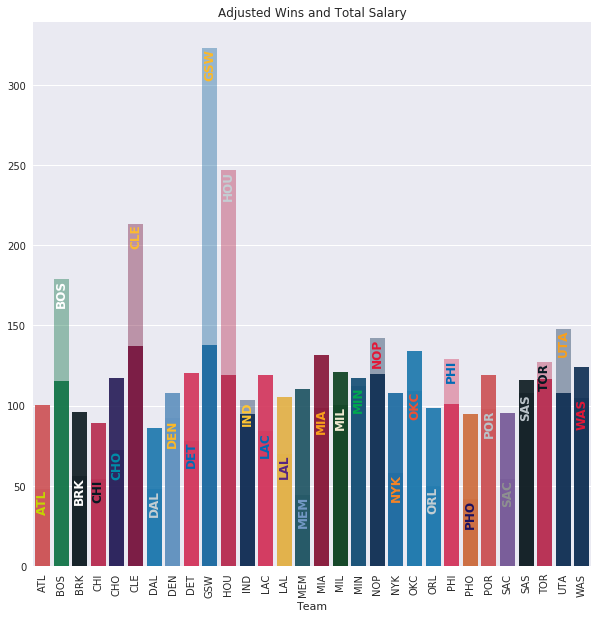

In [145]:
plt.figure(figsize=(10,10))
prim = ['#E13A3E','#008348','#061922','#CE1141','#1D1160','#860038','#007DC5','#4D90CD','#ED174C','#006BB6'
,'#CE1141','#00275D','#ED174C','#FDB927','#0F586C','#98002E','#00471B','#005083','#002B5C','#006BB6','#007DC3',
 '#007DC5','#ED174C','#E56020','#E03A3E','#724C9F','#061922','#CE1141','#002B5C','#002B5C']
sec = ['#C4D600','#ffffff','#ffffff','#061922','#008CA8','#FDBB30','#C4CED3','#FDB927','#006BB6','#FDB927'
,'#C4CED3','#FFC633','#006BB6','#552582','#7399C6','#F9A01B','#F0EBD2','#00A94F','#E31837','#F58426','#F05133',
 '#C4CED3','#006BB6','#1D1160','#BAC3C9','#8E9090','#BAC3C9','#061922','#F9A01B','#E31837']
sns.set()
pal = sns.color_palette(prim)
sns.set_palette(pal)
g = sns.barplot(x='Team',y='Adj Wins', data=df, alpha=.4)

s = sns.barplot(x='Team',y='Salary in Millions', data=df, alpha=.9)
g.set_ylabel('')
for item in g.get_xticklabels():
    item.set_rotation(90)
for index, row in df.iterrows():
    valign = 'top'
    g.text(index,row['Adj Wins'], row.Team, color=sec[index], ha="center",va=valign,rotation=90, weight='bold')
g.set_title('Adjusted Wins and Total Salary')
plt.savefig('adjWins-salary-graph.png', format='png')

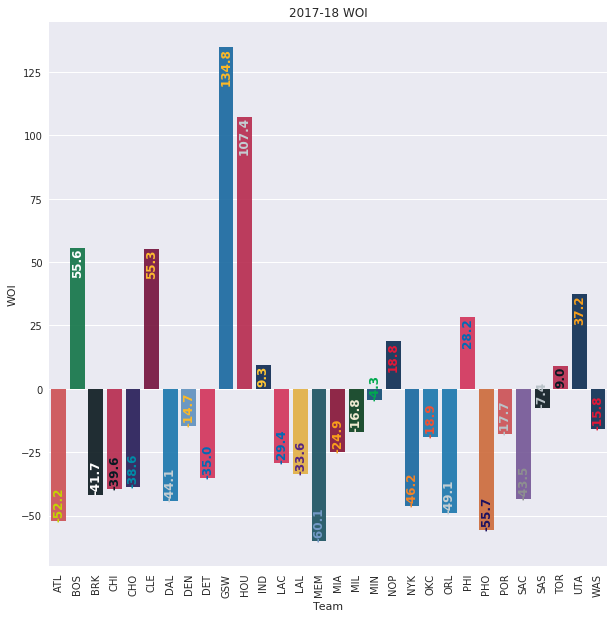

In [146]:

plt.figure(figsize=(10,10))
# p = plt.bar(df.Team,df.WOI,4)
p = sns.barplot(x='Team',y='WOI', data=df, alpha=.9)
for item in p.get_xticklabels():
    item.set_rotation(90)
for index, row in df.iterrows():
    valign = 'top'
    if row.WOI < 0:
        valign = 'bottom'
    p.text(index,row.WOI, round(row.WOI,1), color=sec[index], ha="center",va=valign,rotation=90, weight='bold')
p.set_title('2017-18 WOI')
plt.savefig('woi-graph.png', format='png')

$$\large {Adjusted\ Wins = 2\cdot RegSeason Wins + 2(Wins_{R1} + OppSRS_{R1})+ 4(Wins_{R2} + OppSRS_{R2})+ 8(Wins_{ConfFinals} + OppSRS_{ConfFinals})+ 16(Wins_{Finals} + OppSRS_{Finals})}$$

$$\normalsize {ROI = \frac{Returns\ On\ Investment - Investments}{Investments}}$$

$$\normalsize {WOI = \frac{Adjusted\ Wins - Total\ Salary}{Total\ Salary}}$$